<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preparation***

###**Tenggat Waktu: 06 Maret 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab3_NPM_Nama.ipynb**. Contoh: F_Lab3_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **06 Maret 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan penalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


## **Preprocessing pada Melbourne Housing Dataset**

Sumber: https://www.kaggle.com/anthonypino/melbourne-housing-market dengan beberapa perubahan


### Import Library dan Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [ ]:
housing1 = pd.read_csv('data_melbourne_housing.csv')

In [ ]:
# Mencetak dimensi data
print("data: ", housing1.shape)

data:  (21684, 21)


In [ ]:
# Membaca kolom-kolom pada DataFrame
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21684 entries, 0 to 21683
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21684 non-null  object 
 1   Address        21684 non-null  object 
 2   Rooms          21684 non-null  int64  
 3   Type           21684 non-null  object 
 4   Price          16882 non-null  float64
 5   Method         21684 non-null  object 
 6   SellerG        21684 non-null  object 
 7   Date           21684 non-null  object 
 8   Distance       21684 non-null  float64
 9   Postcode       21684 non-null  int64  
 10  Bedroom2       17413 non-null  float64
 11  Bathroom       17412 non-null  float64
 12  Car            17337 non-null  float64
 13  Landsize       16563 non-null  float64
 14  BuildingArea   9167 non-null   float64
 15  YearBuilt      10566 non-null  float64
 16  CouncilArea    21683 non-null  object 
 17  Lattitude      17562 non-null  float64
 18  Longti

### **Variable Descriptions:**

`Suburb`:          Name of suburb area

`Address`:        Address

`Rooms`:           Number of rooms

`Type`:             Housing Type (h=House, u=Unit, t=Townhouse)

`Price`:             Price

`Method`:           Method sold. 

(S - property sold;

SP - property sold prior;

PI - property passed in;

PN - sold prior not disclosed;

SN - sold not disclosed;

NB - no bid;

VB - vendor bid;

W - withdrawn prior to auction;

SA - sold after auction;

SS - sold after auction price not disclosed.

N/A - price or highest bid not available.)



`SellerG`:           The sellers name

`Date`:          Date sold

`Postcode`:            Postcode

`Bedroom2`: Scraped # of Bedrooms (from different source)

`Bathroom`: Number of bathrooms

`Car`: Number of carspots

`Landsize`: Land size in meters

`BuildingArea`: Area of building in meters

`YearBuilt`: Year the house was built

`CouncilArea`:            Area of council

`Lattitude`: Lattitude

`Longitude`: Longitude

`Regionname`:           Name of region

`Propertycount`:        Number of properties that exist in the suburb.

`Distance`:            Distance from CBD in Kilometres




In [ ]:
housing1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Basic Summary Statistic

In [ ]:
housing1.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,21684.000000,1.688200e+04,21684.000000,21684.000000,17413.000000,17412.000000,17337.000000,16563.000000,9167.000000,10566.000000,17562.000000,17562.000000,21683.000000
mean,2.964490,1.058221e+06,10.087521,3108.198118,2.934130,1.563864,1.609794,545.926704,149.865982,1964.038425,-37.812215,144.998899,7514.879260
std,0.977038,6.461186e+05,5.805875,91.465507,1.000788,0.716166,0.975982,3615.704574,135.470878,37.804069,0.077324,0.102295,4418.260125
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.184180,144.431620,129.000000
25%,2.000000,6.342500e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,173.000000,94.000000,1940.000000,-37.858207,144.939300,4387.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,431.000000,128.000000,1970.000000,-37.809500,145.002715,6567.000000
75%,4.000000,1.305000e+06,13.000000,3149.000000,3.000000,2.000000,2.000000,654.000000,180.000000,2000.000000,-37.760700,145.059845,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,6791.000000,2106.000000,-37.407580,145.526350,21650.000000


Dengan method "describe" kita mendapatkan basic statistics untuk atribut numerik. 

Apa yang bisa diamati?
Pada atribut "Landsize", standard deviasi tampak tinggi, jauh di atas mean, perlu dilihat lebih jauh distribusi datanya.

In [ ]:
# Menampilkan summary dari nonnumeric atribute
display(housing1.describe(include=object))

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,21684,21684,21684,21684,21684,21684,21683,21683
unique,332,21306,3,9,316,56,33,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Boroondara City Council,Southern Metropolitan
freq,591,5,14407,12559,2239,770,2609,8230


Pada tabel di atas, "unique" menunjukkan ada berapa variasi nilai dalam suatu atribut. 
Jika "unique" bernilai 1, atribut tersebut dapat dihapus, karena nilainya sama untuk semua baris.

In [ ]:
# Plot beberapa kolom untuk melihat distribusi frekuensinya
def countplot(column):
    sns.set(rc = {'figure.figsize':(20,8)}) # Untuk mengatur size dari plotnya
    return sns.countplot(x= column, data= housing1)

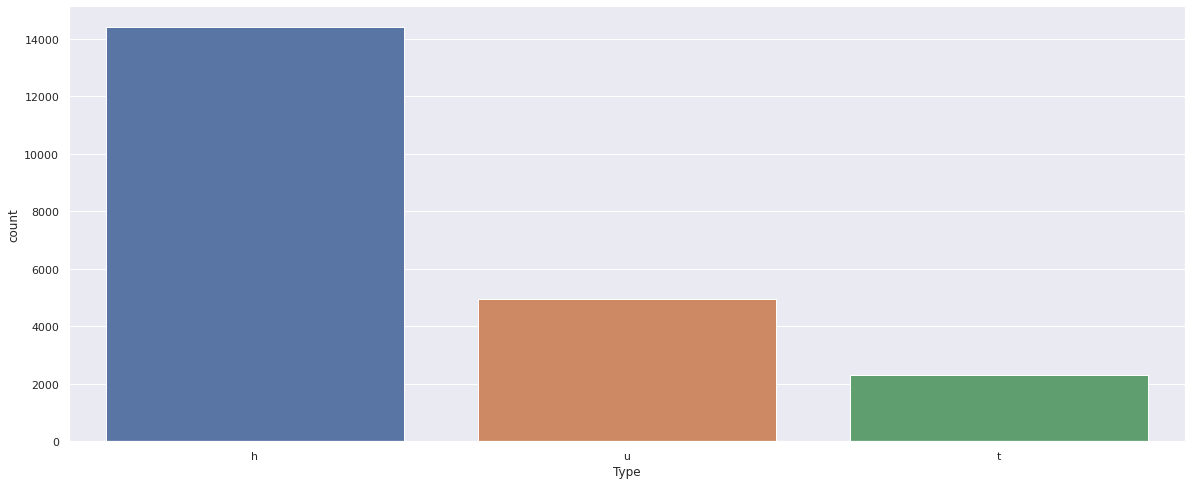

In [ ]:
countplot('Type')

Berdasarkan plot di atas, terlihat bahwa yang tinggi frekuensinya adalah rumah dengan type 'h'.

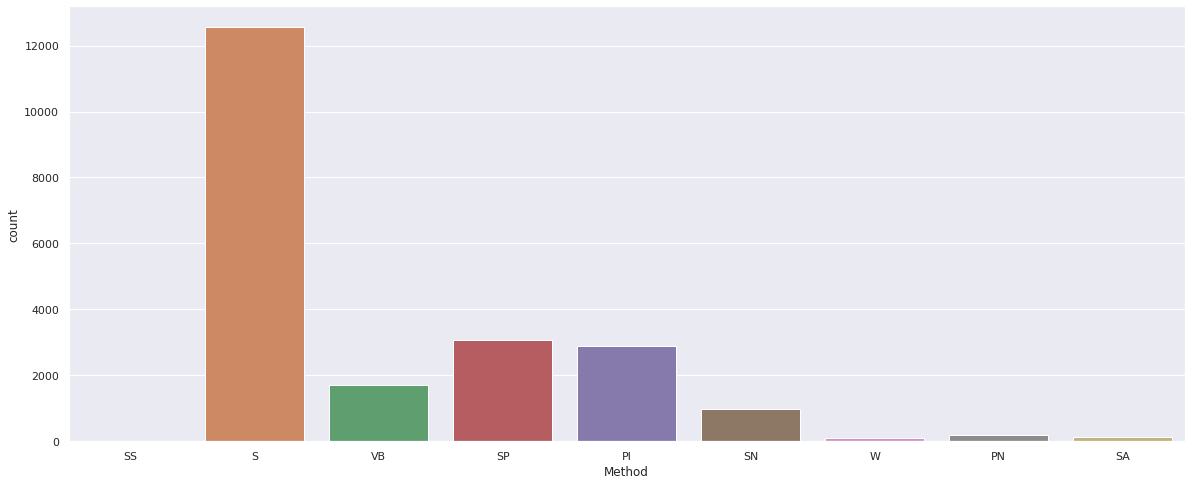

In [ ]:
countplot('Method')

Berdasarkan plot di atas, terlihat bahwa method terbanyak adalah 'S'. (S=property sold)

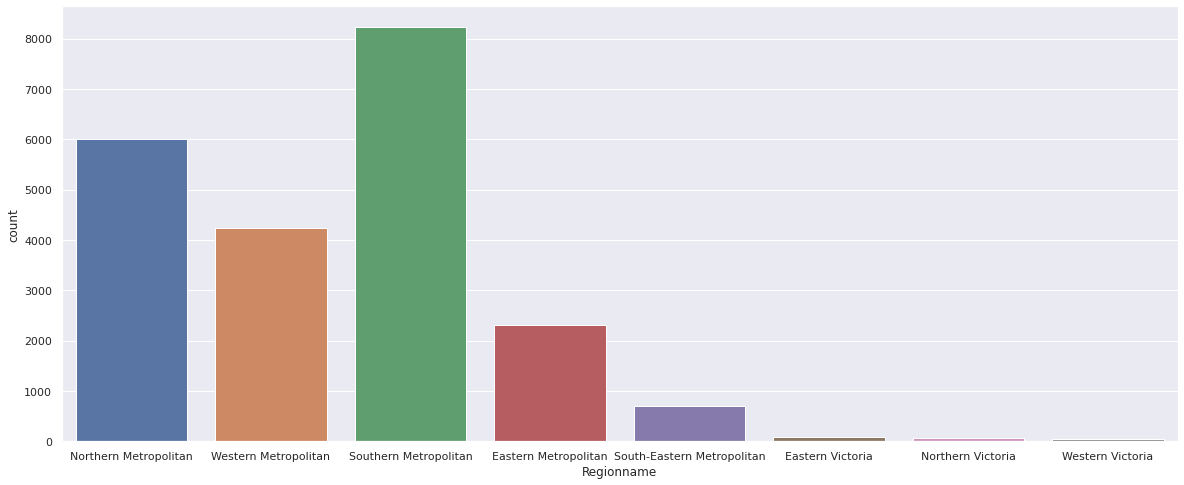

In [ ]:
countplot('Regionname')

Berdasarkan plot di atas, kebanyakan rumah terdapat di region "southern metropolitan".

In [ ]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
housing1.corr(method='pearson')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.503113,0.270958,0.069574,0.928253,0.600393,0.407626,0.025404,0.429406,-0.078963,0.001018,0.112473,-0.089414
Price,0.503113,1.000000,-0.158056,0.111873,0.481279,0.470122,0.241810,0.037664,0.370759,-0.319162,-0.206540,0.201292,-0.050589
Distance,0.270958,-0.158056,1.000000,0.423721,0.280533,0.116557,0.261207,0.023059,0.118422,0.252691,-0.124415,0.244070,-0.063673
Postcode,0.069574,0.111873,0.423721,1.000000,0.068186,0.115049,0.059117,0.021510,0.064704,0.030143,-0.397002,0.441031,0.038075
Bedroom2,0.928253,0.481279,0.280533,0.068186,1.000000,0.601538,0.394338,0.025104,0.419444,-0.062631,-0.000232,0.114965,-0.081403
Bathroom,0.600393,0.470122,0.116557,0.115049,0.601538,1.000000,0.321202,0.033572,0.394719,0.140823,-0.079939,0.123365,-0.046685
Car,0.407626,0.241810,0.261207,0.059117,0.394338,0.321202,1.000000,0.026745,0.244719,0.111463,-0.011870,0.070524,-0.026381
Landsize,0.025404,0.037664,0.023059,0.021510,0.025104,0.033572,0.026745,1.000000,0.081663,0.040893,0.005963,0.014663,-0.005235
BuildingArea,0.429406,0.370759,0.118422,0.064704,0.419444,0.394719,0.244719,0.081663,1.000000,0.014405,-0.056045,0.096175,-0.033756
YearBuilt,-0.078963,-0.319162,0.252691,0.030143,-0.062631,0.140823,0.111463,0.040893,0.014405,1.000000,0.065066,-0.005780,0.005482


In [ ]:
# Mendapatkan nilai korelasi dari atribut nonnumerik, dengan method "chi2"
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

Chi-square dapat digunakan untuk melihat pengaruh atau korelasi dua buah variabel kategorikal dan mengukur
kuatnya hubungan antara variabel yang satu dengan
variabel kategorikal lainnya. Dalam pengertian yang lebih umum, chi-square berguna untuk melihat apakah distribusi variabel kategori berbeda satu sama lain.

Bisa baca lebih lanjut disini: 
https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

In [ ]:
# Korelasi antara survived dengan pclass
compute_freq_chi2(housing1.Type,housing1.Regionname)

Frequency table
Regionname  Eastern Metropolitan  ...  Western Victoria
Type                              ...                  
h                           1787  ...                42
t                            230  ...                 0
u                            298  ...                 0

[3 rows x 8 columns]
ChiSquare test statistic:  761.2558850930708
p-value:  2.1278373889268905e-153


Untuk uji coba Chi-square, disini kita ingin menguji apakah variabel "Type" dan "Regionname" memiliki korelasi (dependent) atau tidak (independent). Oleh karena itu H0nya adalah variabel "Type" dan "Regionname" independent. Setelah kita perhitungkan hasil chi-square dan p-valuenya, kita bisa melihat apabila p-valuenya < 0.05 sehingga H0-nya dapat kita tolak. Artinya terdapat hubungan/korelasi antar variabel "Type" dan "Regionname" 

In [ ]:
# Korelasi antara survived dengan embarked
compute_freq_chi2(housing1.Method,housing1.Type)

Frequency table
Type       h     t     u
Method                  
PI      1776   382   745
PN       113    30    55
S       8752  1245  2562
SA        94    19    32
SN       743    90   150
SP      1915   334   833
SS        15     2     2
VB       959   209   541
W         40     7    39
ChiSquare test statistic:  295.02671752892815
p-value:  2.7296894747957765e-53


Berdasarkan hasil uji-coba p-value kurang dari 0.05, sehingga H0 dapat kita tolak dan menyimpulkan apabila terdapat hubungan antara "Type" dan "Regionname"

## Data Preprocessing

Data Preparation atau data preprocessing adalah suatu proses pembersihan dan transformasi pada raw data sebelum diproses dan dianalisis. Pada beberapa algoritma klasifikasi, dibutuhkan preprocessing khusus agar algoritma dapat berjalan dengan baik.

**DISCLAIMER!**  Pada contoh ini, preprocessing yang 
dilakukan dimaksudkan untuk algoritma yang memiliki karakteristik:
* sensitif terhadap outlier
* fitur-fiturnya perlu memiliki range yang setara

## **SOAL 1**

In [ ]:
# Import data_melbourne_housing2
housing2 = pd.read_csv('data_melbourne_housing2.csv')

In [ ]:
# Menggabungkan dua data frame
frames = [housing1, housing2] 
housing1_2= pd.concat(frames).reset_index(drop=True)

(a) Gabungkanlah, housing1_2 dengan data 'data_melbourne_housing3.csv' untuk membuat merged_housing!

In [ ]:
# 1(a) Implementasi koding disini
housing3 = pd.read_csv('data_melbourne_housing3.csv')
# lanjutkan...

(b) Dari data merged_housing di atas, apakah terdapat redudansi data? Implementasikan dengan code!

In [ ]:
# 1(b) Implementasi code di sini

(c) Apa yang dapat Anda lakukan untuk menangani redudansi data tersebut? Implementasikan dengan code!

In [ ]:
# 1(c) Implementasi code di sini

(d) Berikan alasan mengapa redudansi data perlu ditangani.




> Jawaban disini

(e) Coba analisa data pada kolom "type". Apakah terdapat kejanggalan? Bagaimana cara anda untuk membersihkannya? Implementasikan dengan code!

In [1]:
# 1(e) Implementasi code di sini

### Outlier

Outlier merupakan observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim di sini adalah nilai yang terlalu kecil atau nilai yang terlalu besar jika dibandingkan dengan sebagian besar nilai lain dalam kelompoknya.

Outlier perlu ditangani dengan hati-hati. Hanya karena sebuah data adalah outlier bukan berarti otomatis dihapuskan. Perlu dianalisa kira-kira apa penyebab munculnya outlier. Ada beberapa skenario yang perlu dipertimbangkan:

*   Outliernya terjadi karena _human error_ atau masalah pada input data. Tanda-tanda outlier seperti ini misalkan ada data yang tidak memungkinkan, seperti usia negatif. Apabila jelas seperti ini, data outlier bisa didrop.
*   Apabila outliernya tidak mengubah hasil perhitungan algoritma, tetapi mempengaruhi asumsi, bisa didrop.
* Mungkin outliernya mempengaruhi hasil perhitungan algoritma. Bisa dilakukan perhitungan dengan dan tanpa outlier untuk membandingkan hasilnya.
* Apabila outlier sangat mempengaruhi hasil perhitungan seperti menggambarkan assosiasi pada data yang seharusnya tidak berassosiasi, outliernya bisa didrop.
* Mungkin datanya bisa ditransformasi dengan _square root_ atau log, sehingga outliernya tidak terlalu ekstrem.
* Mungkin model yang digunakan untuk menggambarkan datanya bisa diubah. Ini perlu dilakukan dengan hati-hati. Misalkan menggunakan model non-linear untuk menggambarkan data, dibandingkan model linear.

Ketika mengurus outlier bisa berkonsultasi dengan _domain expert_ untuk lebih memahami sifat outliernya dan mengambil langkah terbaik dalam mengurusnya. Pada akhirnya, perlakuan terhadap outlier disesuaikan dengan observasi dan analisa pada outlier.




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


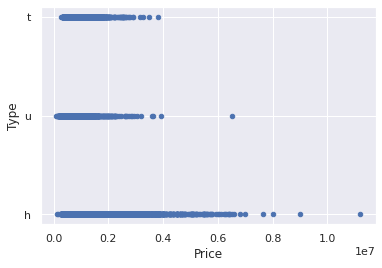

In [ ]:
merged_housing.plot.scatter(x="Price", y='Type', figsize=(6,4))

Dari scatter plot di atas terlihat bahwa ada nilai price yang sangat besar (outlier) pada rumah bertipe "h"

In [ ]:
merged_housing.boxplot(figsize=(20,5))

Boxplot juga dapat digunakan untuk menunjukkan adanya outlier. Bagian utama boxplot merupakan sebuah kotak Box yang menyajikan interquartile range (IQR). Garis yang merupakan perpanjangan dari box dinamakan dengan whiskers. Nilai yang berada di atas atau di bawah whisker dinamakan nilai outlier atau ekstrim.

## **SOAL 2**

(a) Dari boxplot yang Anda lihat, atribut apa yang mengandung outlier paling banyak?

> Berikan jawaban di sini


(b) Implementasikan code untuk menampilkan banyaknya outlier pada atribut tersebut!

In [ ]:
# 2(b) Implementasi code di sini

(c) Apa yang dapat Anda lakukan untuk menangani outlier tersebut? Implementasikan dengan code!



In [ ]:
# 2(c) Implementasi code di sini

### Missing Values

Terkadang data mungkin dalam format yang benar, tetapi beberapa nilainya hilang.

*   Nilai yang hilang terjadi ketika tidak ada nilai data yang disimpan untuk suatu variabel (fitur) dalam suatu observasi.
*   Biasanya missing value di datase muncul sebagai “?”, “T/A”, 0 atau hanya sel kosong.

Untuk menangani missing values, tidak terdapat jawaban tunggal yang selalu bekerja untuk semua skenario, karena  tentunya penanganan missing values harus disesuaikan dengan kondisi data atau fitur yang memiliki missing values. Namun, terdapat beberapa opsi umum yang dapat dipertimbangkan, yaitu: 

*   Periksa lagi dengan orang/kelompok yang mengumpulkan data.
*   Jika kita tidak mengetahui nilai yang hilang, opsi yang mungkin adalah menghapus/drop missing values.
    * Menghapus kolom yang mengandung missing values, atau 
    * Menghapus beberapa baris data yang mengandung missing values.
*  Jika data relatif sedikit, opsi yang mungkin adalah mengganti/replace nilai missing values. 
    * Mengganti nilai missing value dengan nilai mean keseluruhan variabel apabila pada data tidak terdapat terlalu banyak outlier. Dikarenakan mean dipengaruhi oleh outlier.
    * Mengganti nilai missing value dengan nilai median keseluruhan variabel apabila pada data terdapat cukup banyak outlier. 
    * Jika variabelnya non-numerik, ganti nilai missing value dengan frekuensi/modus. 
*   Jika kita berasumsi data tersebut tetap akan berguna meskipun ada fitur yang hilang, maka kita dapat membiarkan missing values. 






In [ ]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)# Menghitung jumlah null value pada setiap kolom kemudian disort dari yang terbesar
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])# Membuat dataframe untuk menampilkan jumlah nilai null per kolom
    print(missing_data[missing_data['Total'] > 0])# Menampilkan kolon yang memiliki null value

In [ ]:
cek_null(merged_housing)

Terdapat beberapa atribut memiliki null value yang sangat banyak, atribut "BuildingArea" memiliki null value yang paling banyak hingga 60%, "YearBuilt" hingga 55%

In [ ]:
# Melihat isi BuildingArea (20 baris pertama)
merged_housing['BuildingArea'].head(20)

In [ ]:
# Drop atribut yang dianggap tidak penting
housing_cleaned = merged_housing.drop(['Date' , 'YearBuilt', 'BuildingArea', 'Bedroom2', "Address"], axis=1)
housing_cleaned.head()

Atribut-atribut tersebut dianggap tidak penting berdasarkan pertimbangan, nalar, atau basic knowledge manusia. Sebagai contoh, apabila kita ingin mengetahui region dari suatu rumah, atribut Date pada dataset ini tidak mengindikasikan apakah asal region dari suatu rumah. Selain itu, ada beberapa atribut juga yang mungkin tidak akan mempengaruhi pengukuran tersebut. Sehingga atribut-atribut tersebut dapat didrop. 


Atribut perlu didrop apabila:

*   Atribut tidak intuitif.
*   Atribut mempunyai banyak missing values.
*   Atribut tidak informatif.
*   Atribut dapat membahayakan untuk model tertentu.
*   Atribut tersebut dapat dihasilkan dari atribut yang lain.



In [ ]:
cek_null(housing_cleaned)

Setelah atribut yang tidak penting dihapus, perlu ditangani atribut yang masih mengandung null value.

In [ ]:
# Untuk atribute "Price", null value akan diisi dengan nilai median
col = ["Price"]
for c in col:
    median = housing_cleaned[~housing_cleaned.isna()].median().Price
    housing_cleaned[c] = housing_cleaned[c].fillna(median)

In [ ]:
# Untuk atribute "Car", null value akan diisi dengan nilai modus
mode = int(housing_cleaned[~housing_cleaned.isna()].Car.mode())
housing_cleaned["Car"].fillna(mode, inplace=True)

In [ ]:
# Untuk atribute "Bathroom", null value akan diisi dengan nilai modus
col = ["Bathroom"]
for c in col:
    mode = int(housing_cleaned[~housing_cleaned.isna()].Bathroom.mode())
    housing_cleaned[c] = housing_cleaned[c].fillna(mode)

In [ ]:
# Untuk atribute "Landsize", null value akan diisi dengan nilai median
col = ["Landsize"]
for c in col:
    median = housing_cleaned[~housing_cleaned.isna()].median().Landsize
    housing_cleaned[c] = housing_cleaned[c].fillna(median)

In [ ]:
cek_null(housing_cleaned)

In [ ]:
# Hapus sisa baris yang memiliki atribut null
housing_cleaned.dropna(inplace=True)

In [ ]:
cek_null(housing_cleaned)

In [ ]:
housing_cleaned.shape

In [ ]:
housing_cleaned.head()

In [ ]:
display(housing_cleaned.describe(include=object))

In [ ]:
# Melakukan label encoding, untuk mengubah data kategorikal bertipe string ke numeric value
col = housing_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(housing_cleaned[c].value_counts()) <= 361:
        le = LabelEncoder() 
        le.fit(list(housing_cleaned[c].values)) 
        housing_cleaned[c] = le.transform(list(housing_cleaned[c].values))

In [ ]:
housing_cleaned.head()

In [ ]:
housing_cleaned.info()

## Preparation for Machine Learning

Misalkan kita diberikan tugas untuk melakukan prediksi asal region dari suatu rumah. Atribut yang menjadi target adalah "Regionname", sedangkan atribut lainnya menjadi *predictor* (fitur yang akan menentukan hasil prediksi).

Beberapa pemrosesan yang dapat dilakukan sebelum data kita dimasukkan di antaranya (tapi tidak terbatas pada):
* Memisahkan atribut target dan atribut *predictor*
* Melakukan normalisasi jika diperlukan
* Memisahkan data menjadi data training dan testing (Akan dibahas pada beberapa Lab selanjutnya)

In [ ]:
# Memisahkan atribut target (Y) dengan atribut predictor (X)
X = housing_cleaned.drop('Regionname', axis=1)
Y = housing_cleaned['Regionname']

## SOAL 3 

(a) Lakukan normalisasi pada X. Implementasikan dengan code! Hint: [Dokumentasi Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [ ]:
# 3(a) Implementasi code di sini

(b) Bentuk normalisasi apa yang Anda pilih? Apa alasannya? 


>Jawab disini

(c) Mengapa perlu dinormalisasi?


> Jawab disini